In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
df = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/Sentencing_prediction/data/df_complete.csv')

In [35]:
df.shape

(185405, 31)

In [36]:
df['sentence_type'].value_counts()

Probation             110355
Confinement            46705
No Further Penalty     17693
Merged                  8196
IPP                     2456
Name: sentence_type, dtype: int64

In [37]:
df.drop(['docket_id', 'defendant_id', 'sequence_number', 'Unnamed: 0'], axis = 1, inplace = True)

In [38]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x',
       'current_processing_status__status_change_datetime',
       'judicial_districts', 'court_office_types', 'court_types',
       'representation_type', 'description', 'statute_description',
       'disposing_authority__title', 'sentence_type', 'gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y', 'disposing_authority'],
      dtype='object')

In [39]:
df.drop(['gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y'], axis = 1, inplace = True)

In [40]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x',
       'current_processing_status__status_change_datetime',
       'judicial_districts', 'court_office_types', 'court_types',
       'representation_type', 'description', 'statute_description',
       'disposing_authority__title', 'sentence_type', 'disposing_authority'],
      dtype='object')

In [41]:
df['judicial_districts'].value_counts()

Philadelphia                               182521
Delaware, Philadelphia                        946
Bucks, Philadelphia                           624
Montgomery, Philadelphia                      541
Chester, Philadelphia                         195
                                            ...  
Lancaster, York, Philadelphia                   1
Berks, Montgomery, Lehigh, Philadelphia         1
Philadelphia, Tioga                             1
Carbon, Lehigh, Philadelphia                    1
Clinton, Philadelphia                           1
Name: judicial_districts, Length: 85, dtype: int64

In [42]:
## 'ifjudicial_districts' is not philadelphia, then drop the row
df = df[df['judicial_districts'] == 'Philadelphia']

In [43]:
df.drop(['court_office_types'], axis = 1, inplace = True)

In [44]:
df.drop(['representation_type'], axis = 1, inplace = True)

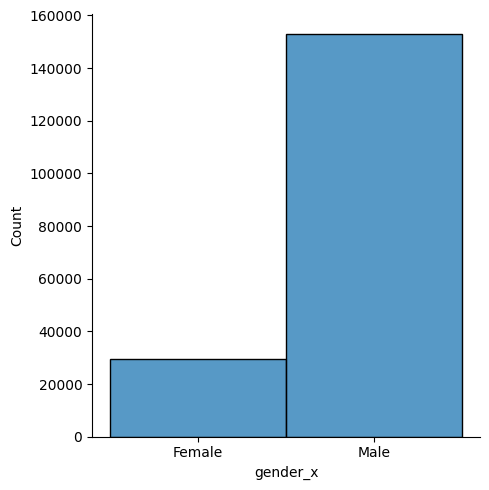

In [45]:
## plotting the genders in the dataset
sns.displot(data=df, x="gender_x")


In [46]:
df['race_x'].value_counts()

Black                             109632
White                              67514
Asian/Pacific Islander              2654
Unknown/Unreported                  2519
Native American/Alaskan Native       111
Bi-Racial                             46
Asian                                 45
Name: race_x, dtype: int64

In [47]:
## lable encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df['race_x']= le.fit_transform(df['race_x'])
df['gender_x'] = le.fit_transform(df['gender_x'])
df['status_name_x'] = le.fit_transform(df['status_name_x'])
df['court_office__court__display_name_x'] = le.fit_transform(df['court_office__court__display_name_x'])
df['court_types'] = le.fit_transform(df['court_types'])

In [49]:
df['sentence_type'] = le.fit_transform(df['sentence_type'])
df.drop(['judicial_districts'], axis = 1, inplace = True)

In [50]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,statute_description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff


In [51]:
df['statute_description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [52]:
df['description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [53]:
df.drop(['statute_description'], axis = 1, inplace = True)

In [54]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff


In [55]:
## creating a data attribute for the age of criminal at the time of arrest and deleting the date of birth column and arrest date column

df['age'] = df['arrest_date_x'].str.split('-').str[0].astype(int) - df['date_of_birth_x'].str.split('-').str[0].astype(int)

df.drop(['date_of_birth_x'], axis = 1, inplace = True)
df.drop('arrest_date_x', axis = 1, inplace = True)




In [56]:
df.head()

,gender_x,race_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,disposing_authority__title,sentence_type,disposing_authority,age
1,0,3,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret,40
3,1,3,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders,57
4,1,5,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,Judge,4,Rayford A. Means,60
7,1,1,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill,39
8,1,6,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff,43


In [57]:
df['disposing_authority__title'] = le.fit_transform(df['disposing_authority__title'])

In [58]:
df['disposing_authority'] = le.fit_transform(df['disposing_authority'])

In [59]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

##one hot encoding the description column

##df['description'] = ohe.fit_transform(df['description'].values.reshape(-1,1)).toarray()


In [60]:
df.head()

,gender_x,race_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,disposing_authority__title,sentence_type,disposing_authority,age
1,0,3,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,3,2,170,40
3,1,3,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",3,0,39,57
4,1,5,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,3,4,136,60
7,1,1,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,3,2,95,39
8,1,6,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",3,0,3,43


In [61]:

from sklearn.model_selection import train_test_split

Y = df['sentence_type']
X = df.drop(['sentence_type'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [68]:
X_train['description'].to_numpy()

array(['DUI: Controlled Substance or Metabolite 1st Offense',
       'Manuf/Del/Poss/W Int Manuf Or Del',
       'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver',
       ..., 'Theft By Unlaw Taking-Movable Prop',
       'Int Poss Contr Subst By Per Not Reg',
       'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'],
      dtype=object)

In [71]:
type(X_train['description'].values)

numpy.ndarray

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train['description'].values)
X_test_cv = cv.transform(X_test['description'].values)

In [75]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
cv.get_feature_names_out()

array(['02', '025', '08', '10', '11', '12', '13', '1547b1', '16', '18',
       '1st', '21', '2nd', '3802', '3rd', '48', '4th', '5000', 'ability',
       'about', 'above', 'abs', 'abuse', 'acc', 'accept', 'access',
       'acci', 'accident', 'accidents', 'accom', 'accommodation',
       'accommodations', 'accurate', 'acq', 'acqu', 'acquis',
       'acquisition', 'act', 'activities', 'acts', 'actual', 'adapted',
       'address', 'admin', 'after', 'against', 'age', 'agency', 'agg',
       'aggrav', 'aggravated', 'agreement', 'agricultural', 'aid',
       'aiding', 'alarm', 'alc', 'alcholol', 'alco', 'alcoh', 'alcohol',
       'alcoholic', 'allow', 'alter', 'alteration', 'altered', 'amt',
       'amusement', 'and', 'anim', 'animal', 'animals', 'anonymous',
       'another', 'anothr', 'antiquity', 'any', 'app', 'apparatus',
       'appearance', 'appli', 'application', 'applying', 'appreh',
       'arrest', 'arson', 'as', 'assault', 'assent', 'assist',
       'assistance', 'asslt', 'at', 'a